# AUTONOMIO INTRODUCTION - Capability Overview

<img src='http://autonom.io/wp-content/uploads/2017/08/autonomio_logo.png' align='left'>

30th of August, 2017

<a href='https://github.com/autonomio/core-module/blob/dev/notebooks/autonomio_data_preparation.ipynb'>DOWNLOAD THIS NOTEBOOK</a>

## About this Demo

Using a regular server / laptop, this demo can be excecuted in a matter of roughly 10 minutes including the hyperparameter scan. Nothing is hidden, everything actually happens with a single line command. 

## Installing Autonomio

<code>pip install git+https://github.com/autonomio/core-module.git</code>

## Downloading this Notebook

1) If you're working from a desktop machine <a href=>click here</a>.

2) If you're working from a server:

<code>wget link</code>

## Running an LSTM Model to Predict Time Series

In this example we are going to ingest the Titanic dataset from the <a href='https://www.kaggle.com/c/titanic'>Kaggle challenge</a>. Looking at the the <a href='https://www.kaggle.com/c/titanic/kernels'>kernel examples</a> for this challenge, the ingestion involves between 20 and 100 lines of code in order to get to an acceptable result.

In [2]:
# first we import the wrangler() tool
from autonomio.commands import data, wrangler

# next we load the data as it's provided in Kaggle 
titanic = data('train.csv','file')

# then we prepare the data in a single command 
titanic = wrangler(titanic, y='Survived', starts_with_col='Cabin', first_fill_cols='Cabin', treshold=.8)

179 out of 891 rows dropped
2 out of 12 columns dropped


In the later examples, this exact dataframe will yield us >85% result on the provided test dataset. 

## Training a Simple Neural Network 

We will continue with the Titanic dataset, as we had prepared it in the previous section. Now we just have to train a model, so we can move in to making the predictions on the test dataset.

,batch_size,dropout,epochs,features,ind_var,layers,max_neurons,n=,network_scale,shape,y_transform
0,10,0,150,7,Survived,3,8,712,2563200,funnel,none


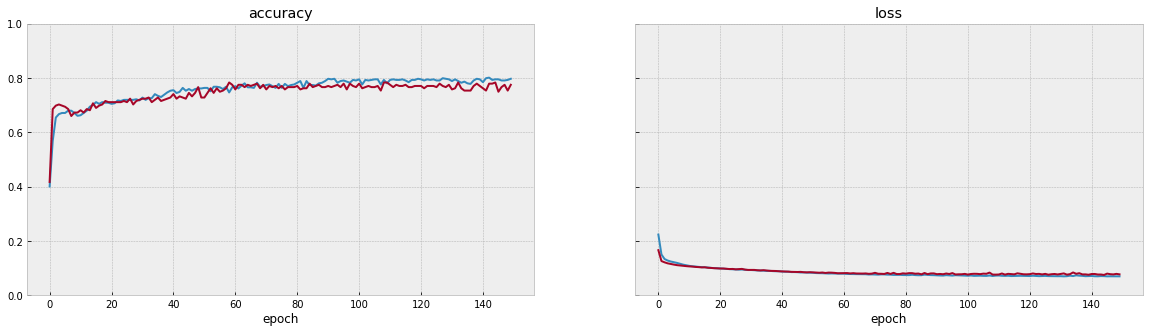

In [211]:
from autonomio.commands import train

%matplotlib inline 

train([2,9], 'Survived', titanic, dropout=0, epoch=150, flatten='none', loss='logcosh')

At this point we're not too interested in the accuracy of the model, but given how little work we've done, 80% is not too bad for a start. More or less, we're working "out of the box". Before going too deep, let's go over a few simple examples. 

## Running an LSTM Model to Predict Time Series

,actual_max,actual_min,actual_std,diff_max,diff_min,diff_std,pred_max,pred_min,pred_std
0,0.29011,-0.515472,0.169486,0.519,0.134,0.174,0.190953,-0.454584,0.144369


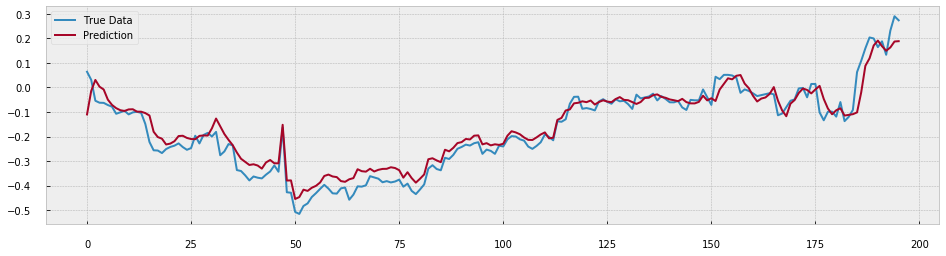

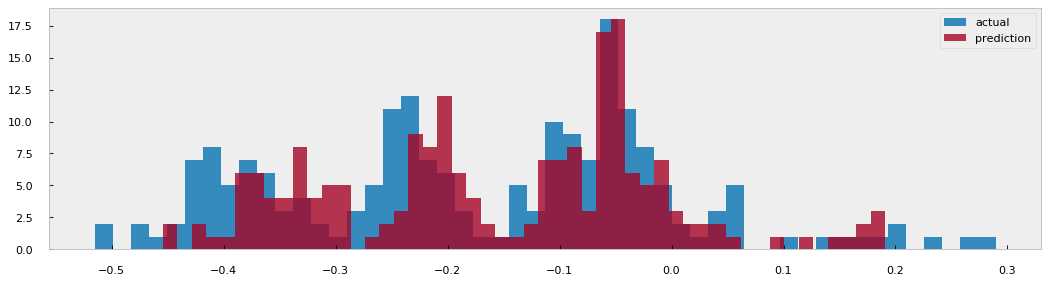

In [213]:
from autonomio.commands import data, train

# loads the bitcoin price dataset from autonomio datasets
btc = data('bitcoin_price')

# make plots visible in the notebook
%matplotlib inline

# run a train command using LSTM model
train(btc['price'], model='lstm')

Again, we are getting a good starting point result, this time with zero parameter configuration. We just input the data (bitcoin daily historical price) and choose the LSTM as the model we want to use, and that's it. 

## Working with Unstructured Data

One of the bigger headaches associated with data science is dealing with various kinds of text data. In this example we'll ingest tweets for sentiment prediction. 

In [214]:
from autonomio.commands import data, train

# loads the tweet sentiment dataset from autonomio datasets
tweets = data('tweet_sentiment')

# remove tweets that are not negative and sample down to ~2,000 tweets
tweets = tweets[tweets.neg > 0].sample(frac=.1)

tweets.head()

,text,neg,pos
3131,RT @ukinfiji: Congratulations @maryroko for b...,0.340,0.8020
32248,RT @vegasWATCH: Didn't even bother photoshoppi...,0.150,-0.1190
4813,"Knicks: Derrick Rose out 3-6 weeks after ""unco...",0.112,0.1027
15969,Can you recommend anyone for this #job? Food S...,0.143,0.3612
84466,🙌 YASSS It's time for a great show Gigi💋babe:W...,0.255,0.6249


We now have a dataset with just negative tweets, where one column is text, and two columns are values related with sentiment. The sentiment classification is provided by NLTK, a solution widely used in academic literature and industry alike.

,batch_size,dropout,epochs,features,ind_var,layers,max_neurons,n=,network_scale,shape,y_transform
0,10,0.2,150,300,neg,3,360,2165,350730000,funnel,0.9


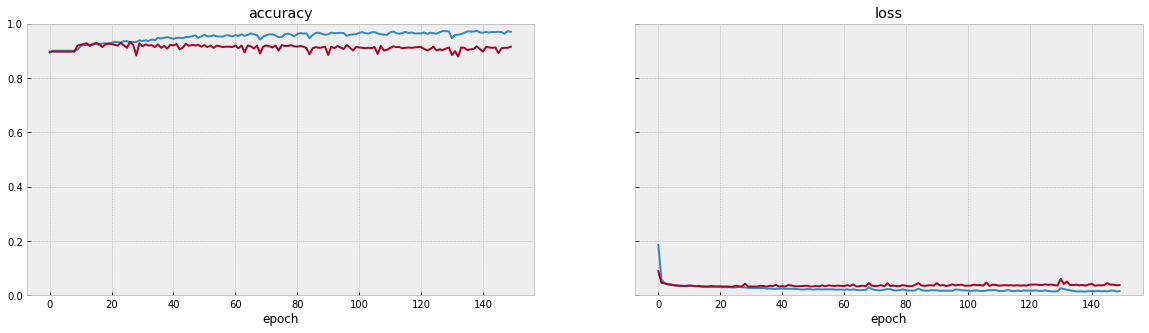

In [215]:
train('text','neg', tweets, loss='logcosh', dropout=0.2, epoch=150, flatten=.9, w_reg_values=[0.02,0.02])

Generally 85% accuracy is considered the upper boundary of the sentiment classification problem, as even human coders rarely agree with each other above 85%. In fact, studies have shown that even a single human coder working on the sentiment classification may have up to 20% disagreement across a larger sample without frequent calibration inverval.

## Performing a Grid Hyperparameter Search

In [216]:
from autonomio.commands import data, hyperscan

# loads the pima indians diabetes dataset from a file
diabetes = data('diabetes.csv','file',header=None)

# run a grid search covering some obvious options
result = hyperscan([0,8],'i', diabetes, 
                   epochs=150, 
                   scan_mode='selective',
                   batch_sizes=[12,14],
                   layers=[2,5], 
                   losses='logcosh', 
                   optimizers=['adam','nadam'],
                   activations=['linear','softsign','elu'],
                   shapes=['brick','diamond'])

Total tries in this scan: 72
Scan started on: 06:22
Estimated finish: 06:28


In [217]:
result.head()

,train_acc,train_acc_mean,train_acc_min,train_acc_max,train_acc_std,train_loss,train_loss_mean,train_loss_min,train_loss_max,train_loss_std,...,activation_out,loss,optimizer,epochs,layers,features,dropout,batch_size,max_neurons,network_scale
0,0.645914,0.645914,0.429961,0.661479,2.958391e-09,0.153596,0.153596,0.144191,0.244953,8.409436e-10,...,sigmoid,logcosh,adam,150,2,8,0,12,9,2073600
1,0.657588,0.657588,0.552529,0.671206,9.123927e-10,0.148532,0.148532,0.141534,0.192596,2.583403e-09,...,sigmoid,logcosh,adam,150,2,8,0,13,9,2073600
2,0.663424,0.663424,0.657588,0.663424,2.665621e-09,0.146000,0.146000,0.146000,0.148287,1.098756e-09,...,sigmoid,logcosh,adam,150,3,8,0,12,9,3110400
3,0.659533,0.659533,0.624514,0.663424,9.942123e-10,0.147688,0.147688,0.145920,0.160361,8.342318e-10,...,sigmoid,logcosh,adam,150,3,8,0,13,9,3110400
4,0.653696,0.653696,0.599222,0.653697,1.932551e-09,0.150220,0.150220,0.149833,0.171242,1.089007e-09,...,sigmoid,logcosh,adam,150,4,8,0,12,9,4147200


In [17]:
print result.columns.values

['train_acc' 'train_acc_mean' 'train_acc_min' 'train_acc_max'
 'train_acc_std' 'train_loss' 'train_loss_mean' 'train_loss_min'
 'train_loss_max' 'train_loss_std' 'test_acc' 'test_acc_mean'
 'test_acc_min' 'test_acc_max' 'test_acc_std' 'test_loss' 'test_loss_mean'
 'test_loss_min' 'test_loss_max' 'test_loss_std' 'shape' 'activation'
 'activation_out' 'loss' 'optimizer' 'epochs' 'layers' 'features' 'dropout'
 'batch_size' 'max_neurons' 'network_scale']


As you can see, in return we get a dataframe with the results of the hyperparameter scan. Let's take a loot at the findings from this small scan. 

## Analyzing Hyperparameter Grid Search Results

One part of hyperparameter scanning (grid search) is the convinience at which the initial configuration can be made, and another is how results can be analyzed. Below are some examples of the in-built capabilities that streamline the analysis part.

In [218]:
from autonomio.hyperstats import hyper_descriptive

# provides a groupby table based on selections
hyper_descriptive(result,['activation','batch_size'],'test_acc_max','max')

test_acc_max
activation batch_size              
elu        13              0.803150
           12              0.799213
softsign   13              0.775591
           12              0.736220
linear     12              0.708661
           13              0.677165

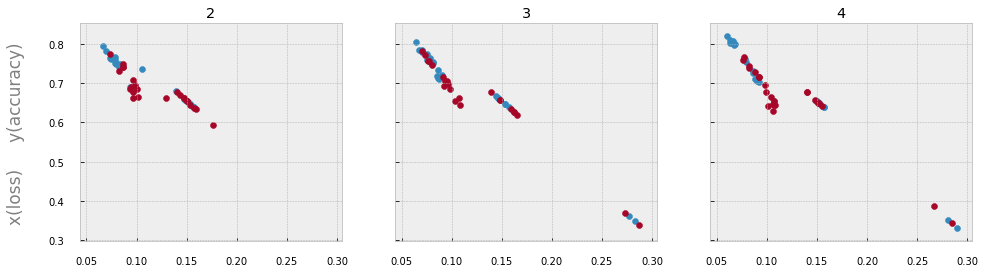

In [219]:
# comparing any number of parameters in a grid
from autonomio.plots.paramgrid import paramgrid

paramgrid(result,'layers')

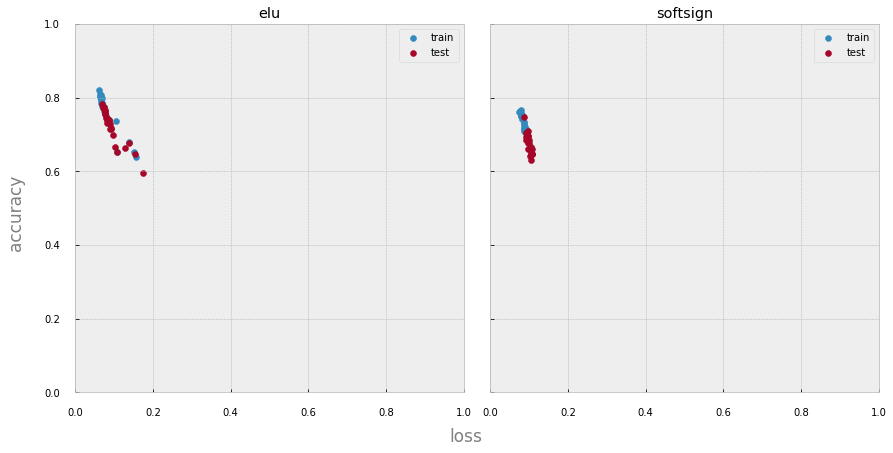

In [220]:
# comparing two values of a parameter side-by-side
from autonomio.plots.duaparam import duaparam

duaparam(result,'activation','elu','softsign')

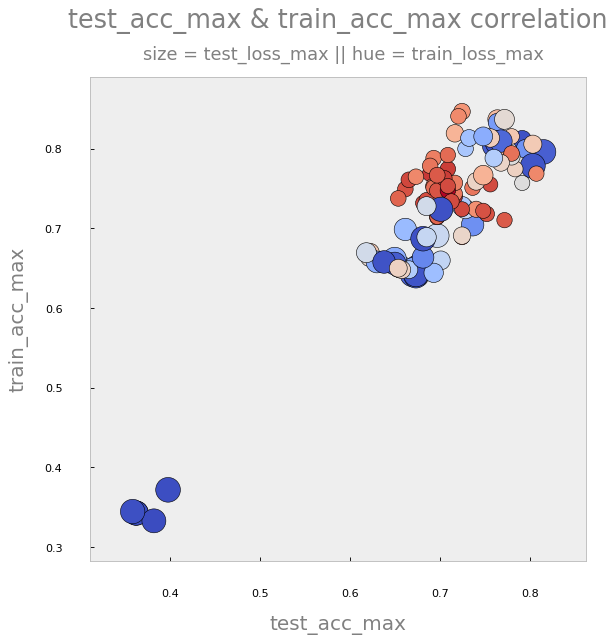

In [21]:
# comparing four dimensions of data in one plot
from autonomio.plots.quadparam import quadparam
%matplotlib inline

quadparam(result,'test_acc_max','train_acc_max','test_loss_max','train_loss_max')

One way to understand parameters is to also see what is not working, as opposed to just what is working. Also it's generally more valuable to understand how combinations work rathern than single parameters.

In [222]:
# provides a groupby table based on selections
hyper_descriptive(result,['activation','layers','batch_size'],'test_acc_max','max')

test_acc_max
activation layers batch_size              
elu        4      13              0.803150
           3      13              0.799213
           4      12              0.799213
           2      12              0.791339
           3      12              0.779528
softsign   2      13              0.775591
                  12              0.736220
           3      13              0.724409
                  12              0.724409
           4      13              0.720472
elu        2      13              0.716535
linear     2      12              0.708661
softsign   4      12              0.696850
linear     4      13              0.677165
           2      13              0.657480
           4      12              0.657480
           3      12              0.657480
                  13              0.653543

## Training and Saving a Model for Predictions

### Saving a Trained Model

Probably the most common usecase for deep learning is training a model, saving it, and then using it as part of some solution outside of the training environment / data. Let's go back to the Titanic example to do that. 

In [3]:
from autonomio.commands import train

train([2,9],
      'Survived', 
      titanic, 
      dropout=0.1, 
      epoch=500,
      layers=6,
      batch_size=12,
      flatten='none', 
      loss='logcosh',
      activation='elu',
      shape='brick',
      validation_split=.1,
      save_model='titanic_raw')

Model titanic_raw have been saved.


,batch_size,dropout,epochs,features,ind_var,layers,max_neurons,n=,network_scale,shape,y_transform
0,12,0.1,500,7,Survived,6,8,712,17088000,brick,none


As you can see, this time we have envoked a few additional parameters in hopes to improve the model slightly, and also are saving the model to a file. Even though the score is ~80%, getting a similar score in Kaggle typically requires 50 to 100 lines of code.  

### Using a Saved Model for Predictions

87 out of 418 rows dropped
2 out of 11 columns dropped


,predictions,median_prediction,mean_prediction,std_prediction,min_prediction,max_prediction
0,331.0,0.192387,0.424853,0.374319,0.072659,0.999907


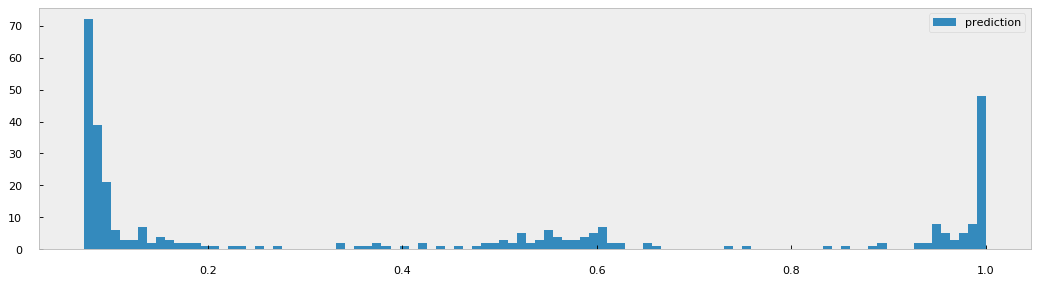

In [6]:
from autonomio.commands import predictor, data, wrangler

# loading the Titanic Kaggle test data from disc
titanic_test = data('test.csv','file')

# transforming the data in the same way as the data for the trained model
titanic_test = wrangler(titanic_test, starts_with_col='Cabin', first_fill_cols='Cabin', treshold=.7)

# making predictions with the saved model
predictions = predictor(titanic_test,'titanic_raw', labels='PassengerId')

### Interactive Plotting for Predictions

Sometimes it's useful for prediction evaluation to be able to see how specific items are ranked, for this Autonomio provides an interactive plot.

,predictions,median_prediction,mean_prediction,std_prediction,min_prediction,max_prediction
0,331.0,0.192387,0.424853,0.374319,0.072659,0.999907


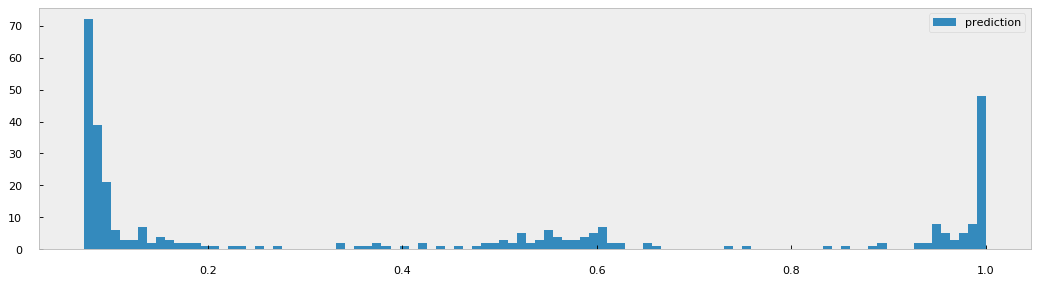

In [10]:
from autonomio.plots.scatterz import scatterz

# making predictions with interactive plot data output
predictions = predictor(titanic_test,
                        'titanic_raw',
                        labels='PassengerId',
                        interactive=True,
                        interactive_x='Fare')

Then using the output from the predictor, we can separately invoke the interactive plot.

In [11]:
# invoking the interactive plot 
scatterz('Fare','Prediction', predictions, labels='PassengerId')

More or less everything that has to do with the deep learning workflow is as easy as that with Autonomio. Go ahead and try now with your own dataset next! :)

## Install Autonomio

<code> pip install git+https://github.com/autonomio/core-module.git </code>

<img src='https://img09.deviantart.net/0248/i/2013/295/d/8/that_s_all_folks__by_surrimugge-d6rfav1.png'>

<a href='http://autonom.io'>Autonomio Website</a>

<a href='https://github.com/autonomio/core-module'>On Github</a>

<img src='http://autonom.io/wp-content/uploads/2017/08/autonomio_logo.png' align='left'>